In [2]:
import pandas as pd

# Load the dataset from the data directory
data = pd.read_csv('../data/bank_transactions_data_2.csv')

# Display the first 5 rows of the dataset
data.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [8]:
# Data information: types and non-null counts
print("Data Information:")
data.info()

# Descriptive statistics for numerical columns
print("Descriptive Statistics:")
print(data.describe())

# Check for missing values in every column
print("Missing Values per Column:")
print(data.isnull().sum())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Accoun

In [5]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [7]:
# Identify transactions where the amount is zero
zero_amount = data[data['TransactionAmount'] == 0]
print("Transactions with zero amount:")
print(zero_amount)

# Get summary statistics to spot any extreme values
print("Summary statistics for transaction amounts:")
print(data['TransactionAmount'].describe())


Transactions with zero amount:
Empty DataFrame
Columns: [TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
Summary statistics for transaction amounts:
count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


In [10]:
# Convert date columns to datetime objects
date_columns = ['TransactionDate', 'PreviousTransactionDate']
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Check the range for TransactionDate
if 'TransactionDate' in data.columns:
    print("TransactionDate range:")
    print("Earliest:", data['TransactionDate'].min())
    print("Latest:", data['TransactionDate'].max())



TransactionDate range:
Earliest: 2023-01-02 16:00:06
Latest: 2024-01-01 18:21:50


In [13]:
# Check that CustomerAge is within a plausible range (e.g., 18 to 100)
invalid_age = data[(data['CustomerAge'] < 18) | (data['CustomerAge'] > 100)]
print("Transactions with invalid CustomerAge:")
print(invalid_age)

# Check that LoginAttempts are non-negative
negative_logins = data[data['LoginAttempts'] < 0]
print("Transactions with negative LoginAttempts:")
print(negative_logins)

# Summary statistics for TransactionDuration to spot outliers or zeros
print("Summary statistics for TransactionDuration:")
print(data['TransactionDuration'].describe())


Transactions with invalid CustomerAge:
Empty DataFrame
Columns: [TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
Transactions with negative LoginAttempts:
Empty DataFrame
Columns: [TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []
Summary statistics for TransactionDuration:
count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


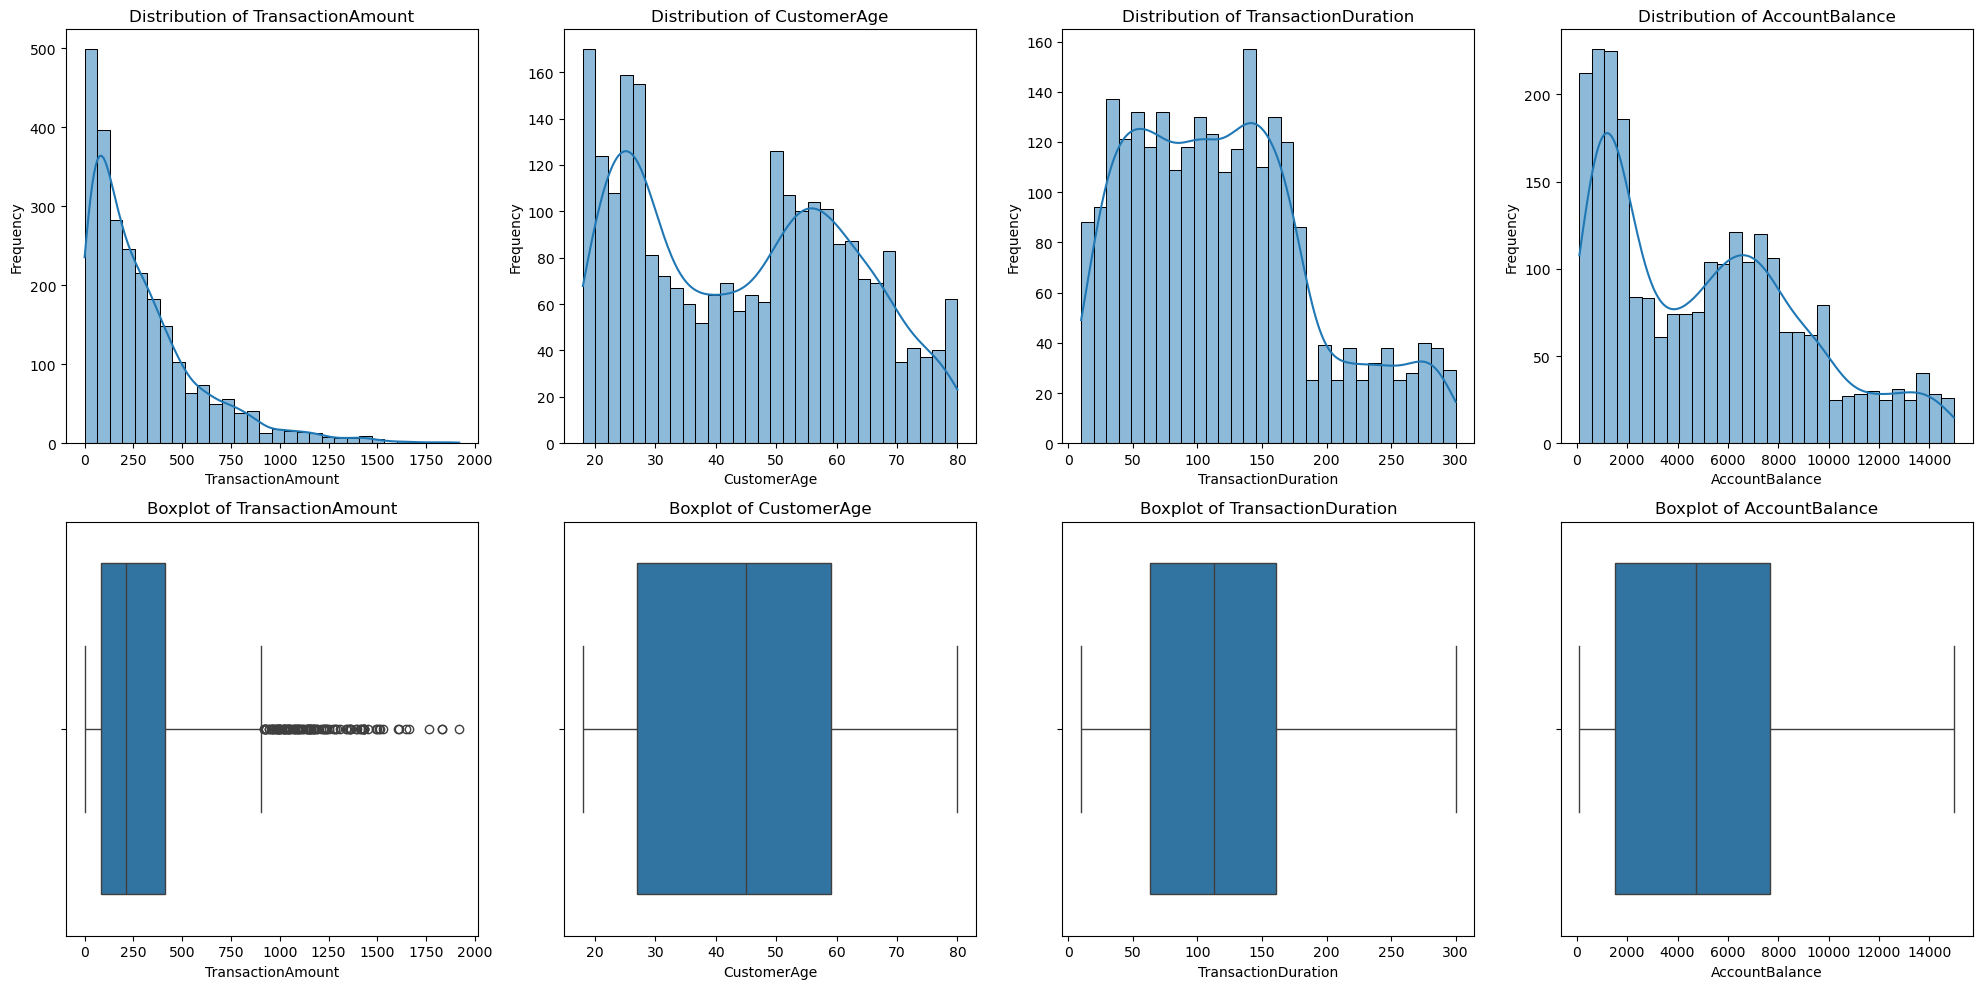

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables to plot
num_vars = ['TransactionAmount', 'CustomerAge', 'TransactionDuration','AccountBalance']

# Create a figure with 2 rows and as many columns as there are numerical variables
fig, axes = plt.subplots(2, len(num_vars), figsize=(5 * len(num_vars), 10))

# Plot histograms on the first row
for i, var in enumerate(num_vars):
    sns.histplot(data[var], bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"Distribution of {var}")
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel("Frequency")

# Plot box plots on the second row
for i, var in enumerate(num_vars):
    sns.boxplot(x=data[var], ax=axes[1, i])
    axes[1, i].set_title(f"Boxplot of {var}")
    axes[1, i].set_xlabel(var)

plt.tight_layout()
plt.show()


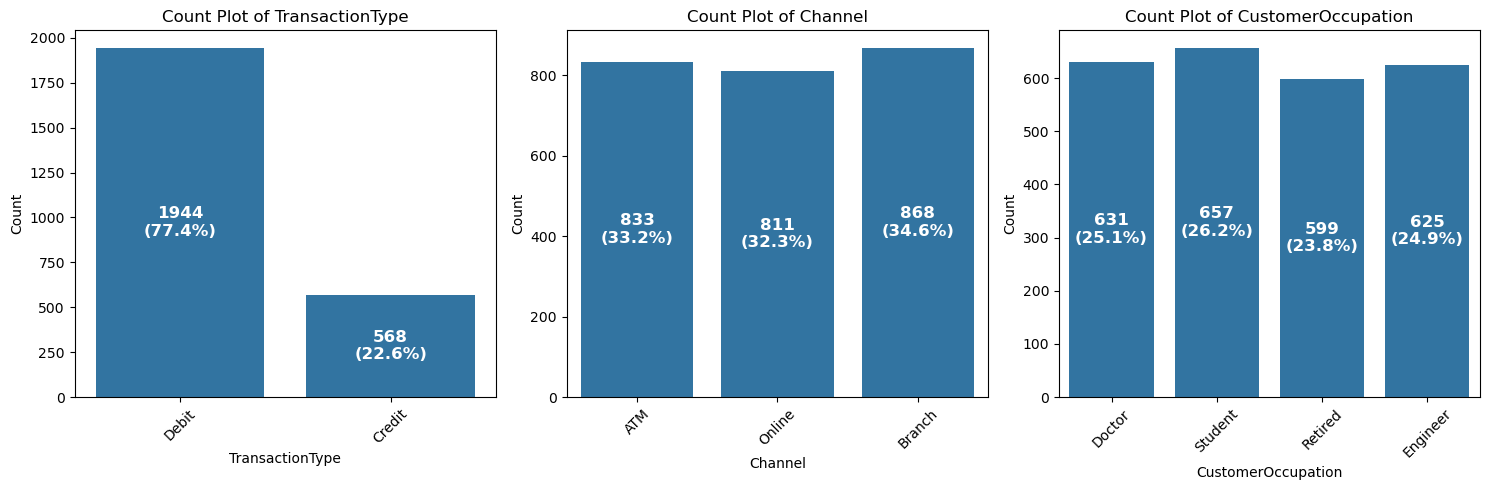

In [27]:
# List of categorical variables to plot
cat_vars = ['TransactionType', 'Channel', 'CustomerOccupation']

# Create subplots: one row per categorical variable
fig, axes = plt.subplots(1, len(cat_vars), figsize=(5 * len(cat_vars), 5))

for i, var in enumerate(cat_vars):
    ax = axes[i]
    total = len(data[var])
    sns.countplot(x=data[var], ax=ax)
    ax.set_title(f"Count Plot of {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
    
    # Annotate each bar: place text at the center of each bar with a larger font size
    for p in ax.patches:
        count = p.get_height()
        percentage = 100 * count / total
        # Calculate the center position of each bar
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() / 2
        ax.annotate(f'{int(count)}\n({percentage:.1f}%)', 
                    (x, y), 
                    ha='center', va='center',
                    fontsize=12, fontweight='bold', color='white')
                    
plt.tight_layout()
plt.show()


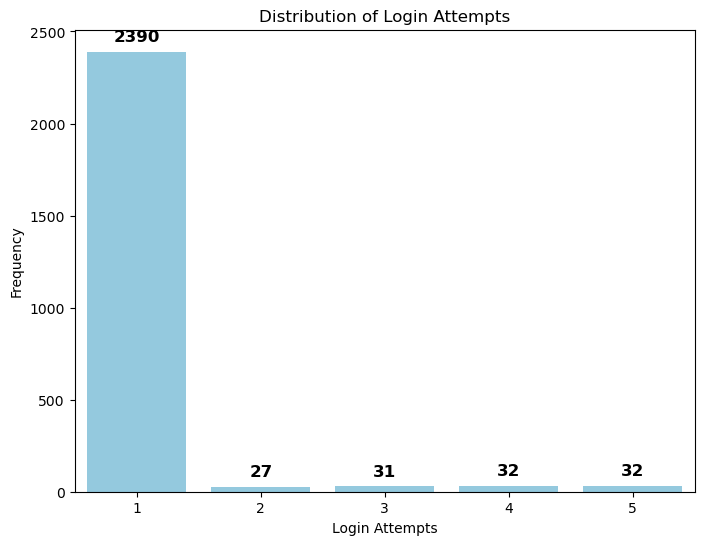

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(x=data['LoginAttempts'], color='skyblue')
plt.title("Distribution of Login Attempts")
plt.xlabel("Login Attempts")
plt.ylabel("Frequency")

# Annotate each bar with the count above the bar
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(count)}',
                (x, y),
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='bold',
                color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()


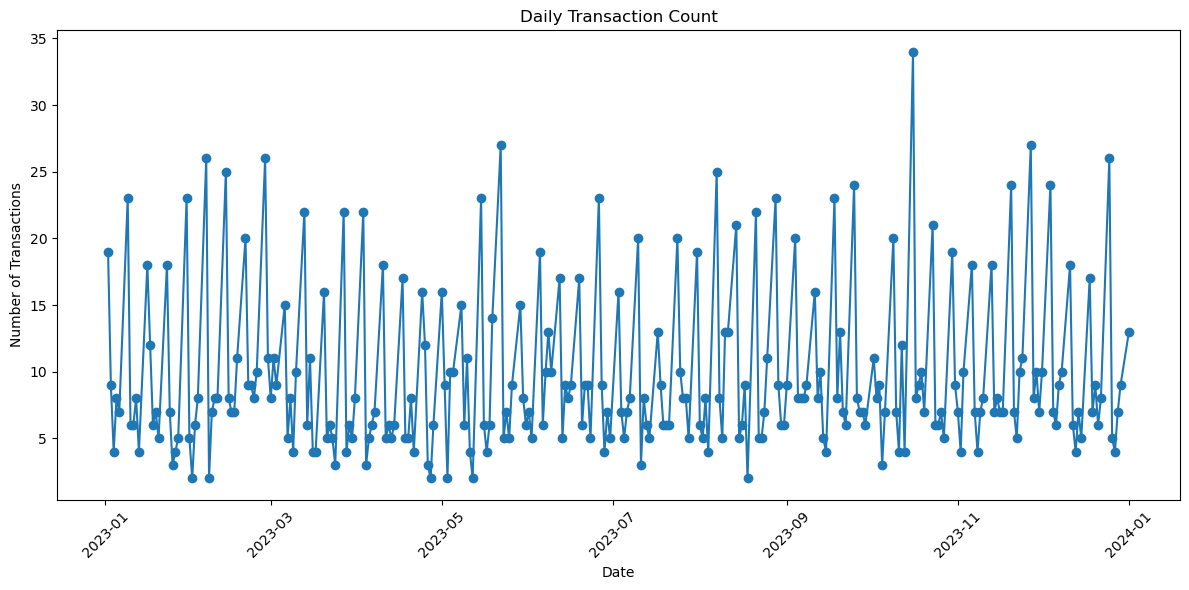

In [29]:
# Group transactions by date
daily_transactions = data.groupby(data['TransactionDate'].dt.date)['TransactionID'].count()

# Plot daily transaction count
plt.figure(figsize=(12, 6))
daily_transactions.plot(kind='line', marker='o')
plt.title("Daily Transaction Count")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\kealankuar.wh\AppData\Local\Temp\ipykernel_23168\121168439.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='viridis')


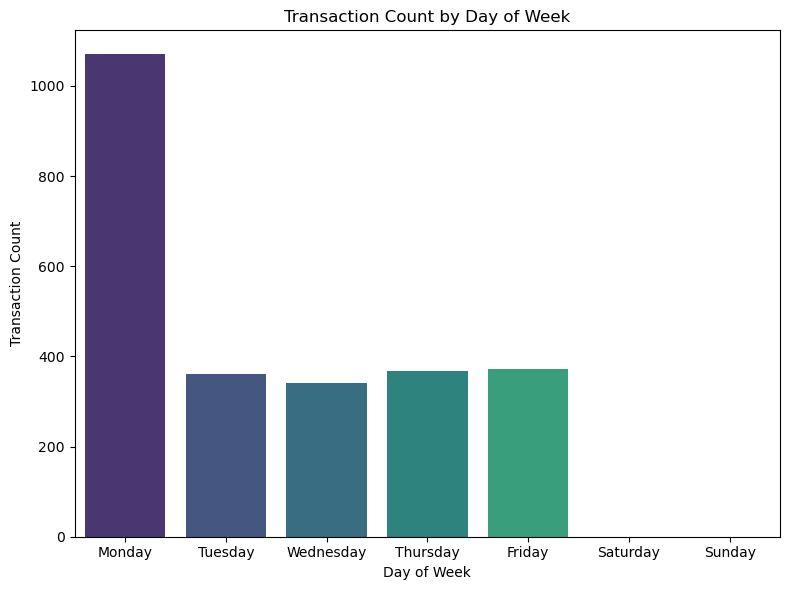

In [30]:
# Create a new column for the day of the week
data['DayOfWeek'] = data['TransactionDate'].dt.day_name()

# Order days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = data['DayOfWeek'].value_counts().reindex(days_order)

# Plot transaction count by day of the week
plt.figure(figsize=(8, 6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette='viridis')
plt.title("Transaction Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Transaction Count")
plt.tight_layout()
plt.show()


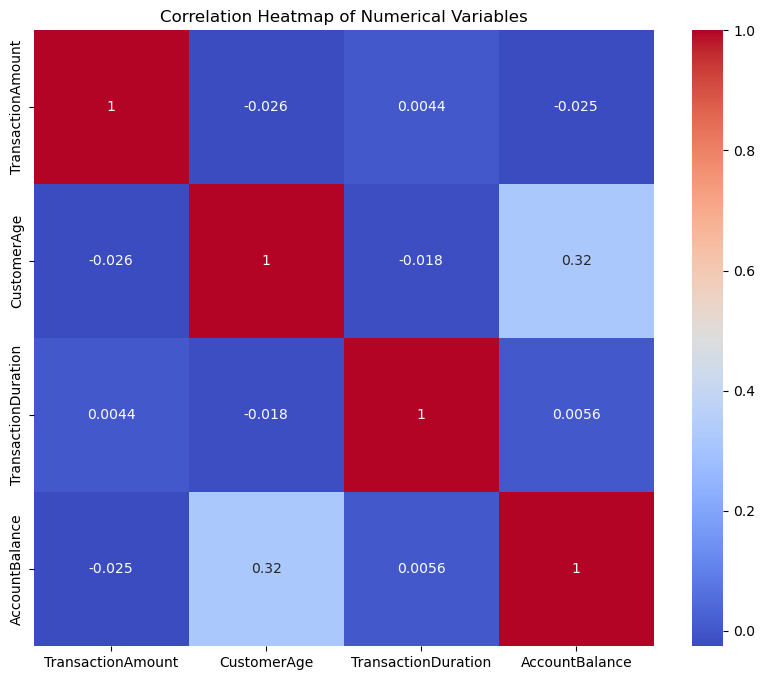

In [42]:
# Define the numerical columns for analysis
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

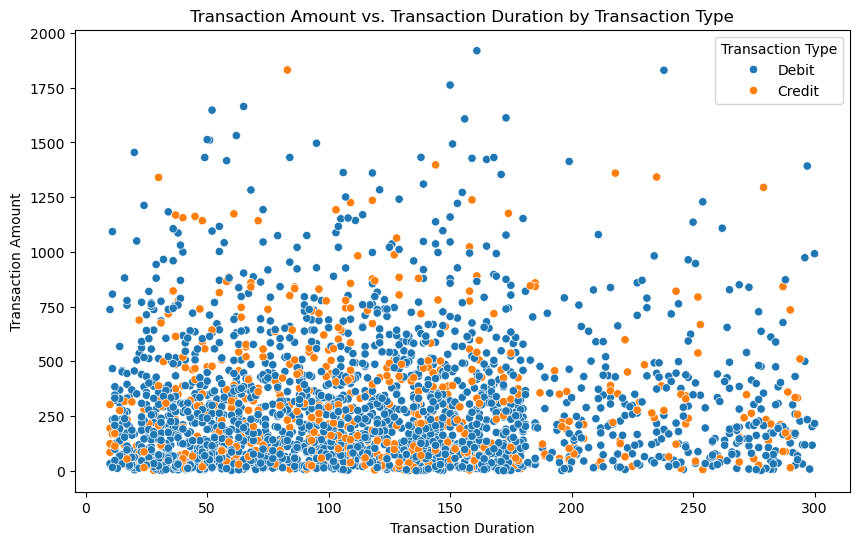

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TransactionDuration', y='TransactionAmount', hue='TransactionType')
plt.title("Transaction Amount vs. Transaction Duration by Transaction Type")
plt.xlabel("Transaction Duration")
plt.ylabel("Transaction Amount")
plt.legend(title='Transaction Type')
plt.show()


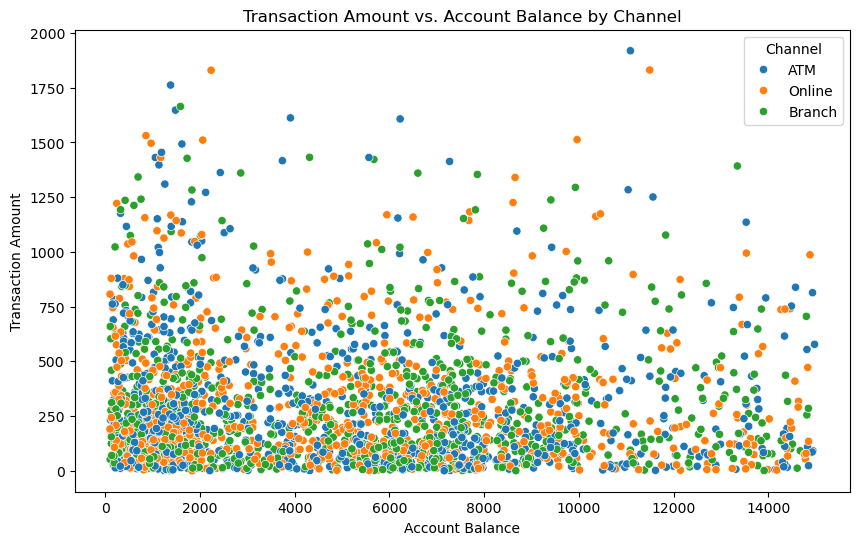

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AccountBalance', y='TransactionAmount', hue='Channel')
plt.title("Transaction Amount vs. Account Balance by Channel")
plt.xlabel("Account Balance")
plt.ylabel("Transaction Amount")
plt.legend(title='Channel')
plt.show()


C:\Users\kealankuar.wh\AppData\Local\Temp\ipykernel_23168\1212666517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TransactionType', y='TransactionAmount', data=grouped_data, palette='viridis')


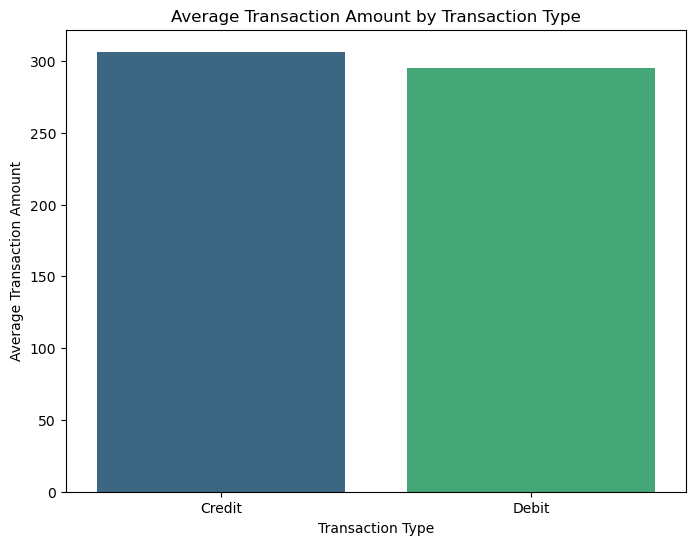

In [39]:
grouped_data = data.groupby('TransactionType')['TransactionAmount'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='TransactionType', y='TransactionAmount', data=grouped_data, palette='viridis')
plt.title("Average Transaction Amount by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Average Transaction Amount")
plt.show()


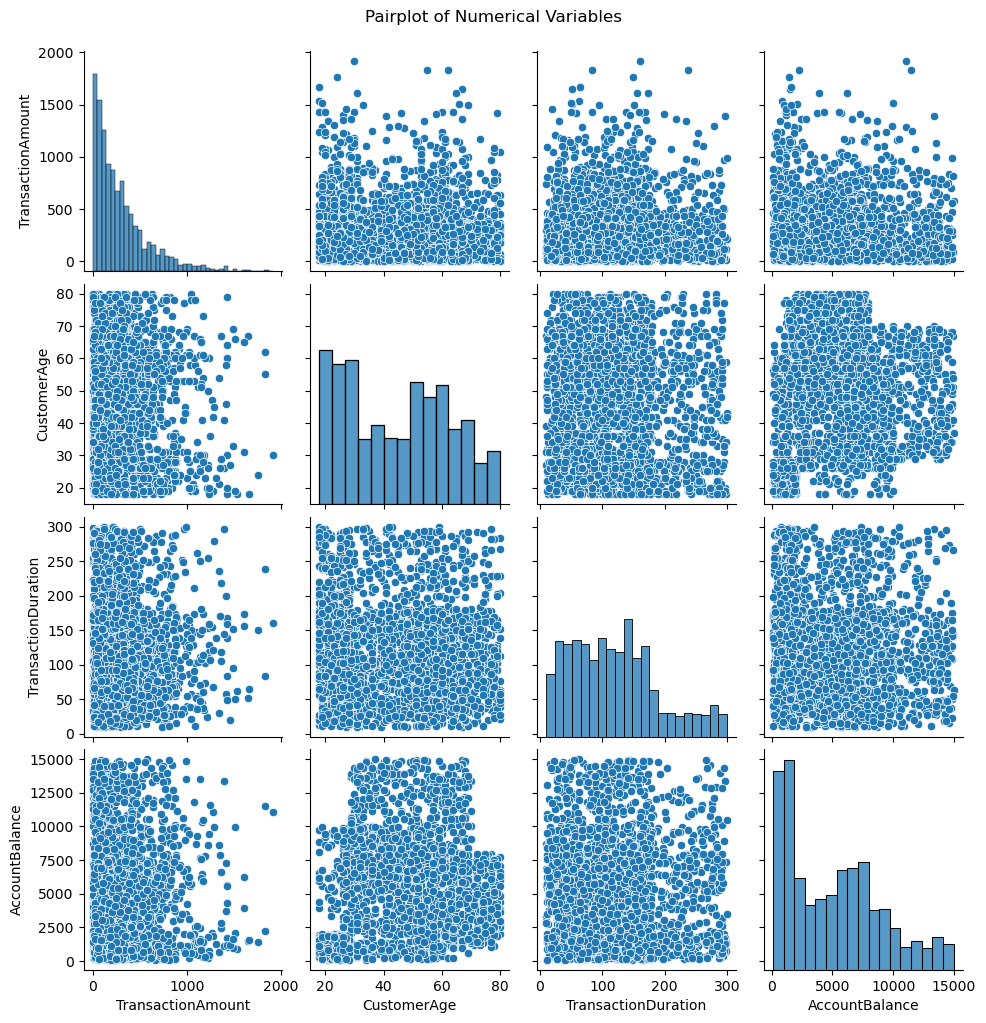

In [43]:
sns.pairplot(data[numerical_cols])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()


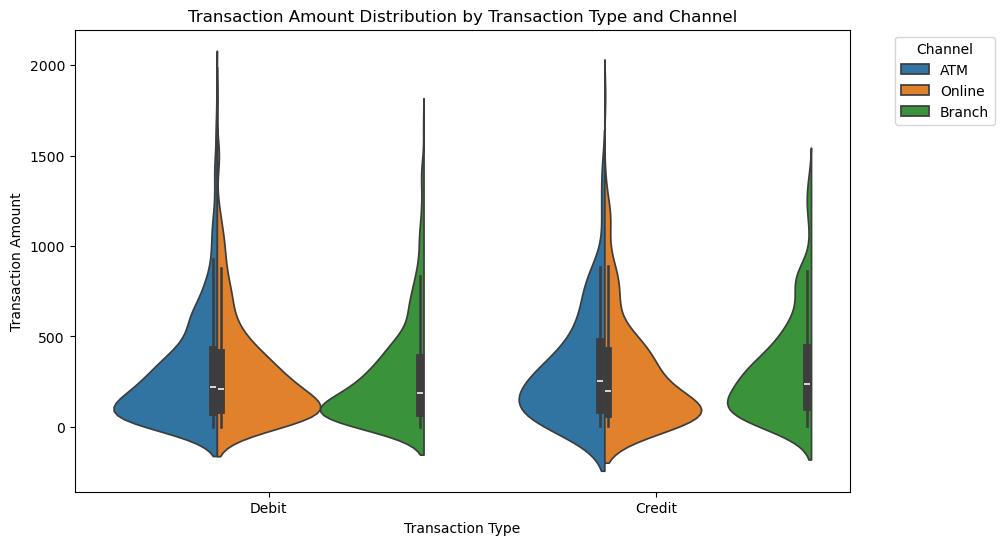

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='TransactionType', y='TransactionAmount', hue='Channel', split=True)
plt.title("Transaction Amount Distribution by Transaction Type and Channel")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [45]:
# Group data by AccountID and count unique values for selected fields
account_variations = data.groupby("AccountID").agg({
    "IP Address": "nunique",
    "DeviceID": "nunique",
    "Location": "nunique"
}).reset_index()

# Rename columns for clarity
account_variations.columns = ["AccountID", "Unique_IPs", "Unique_DeviceIDs", "Unique_Locations"]

# Preview the aggregated variations per account
print(account_variations.head())


  AccountID  Unique_IPs  Unique_DeviceIDs  Unique_Locations
0   AC00001           2                 2                 2
1   AC00002           7                 7                 7
2   AC00003           5                 5                 5
3   AC00004           9                 9                 9
4   AC00005           9                 9                 9


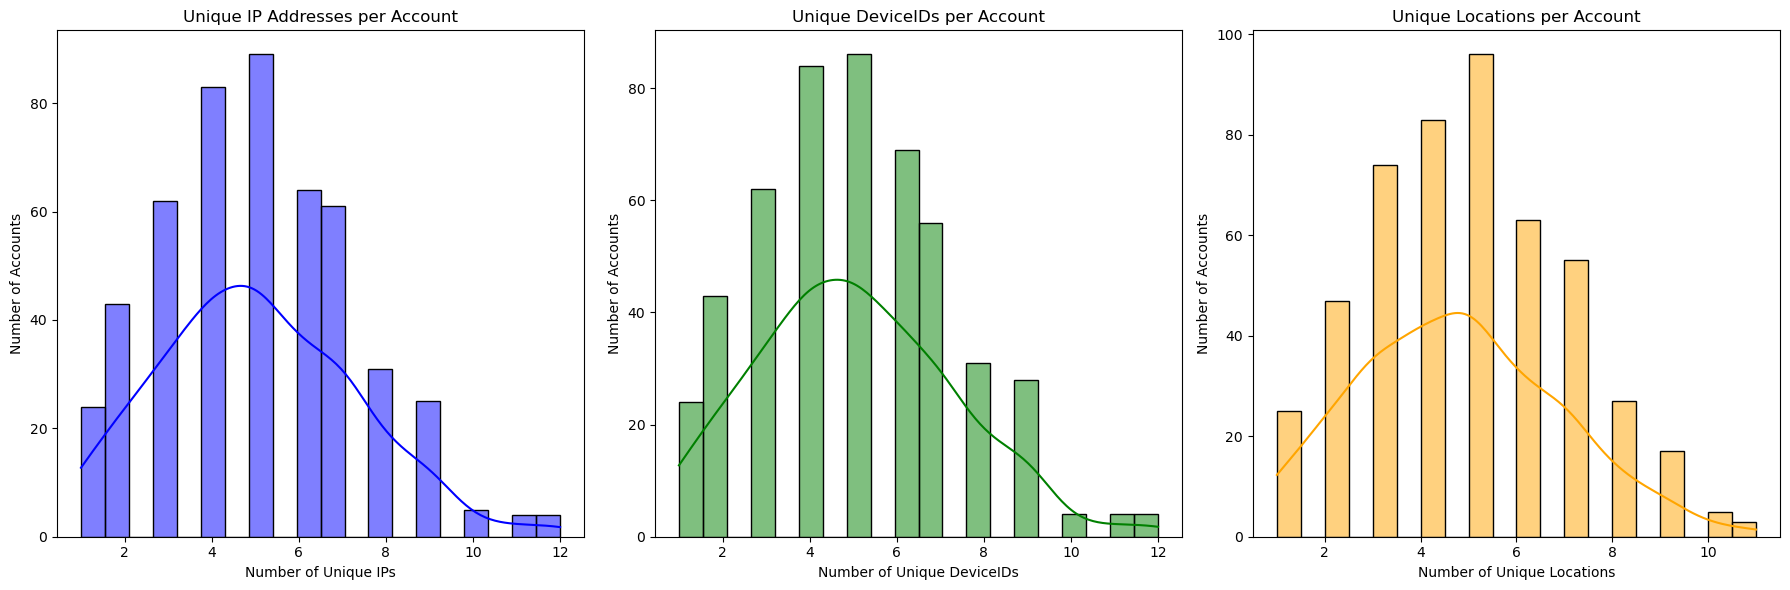

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Histogram for Unique IP Addresses per account
plt.subplot(1, 3, 1)
sns.histplot(account_variations["Unique_IPs"], bins=20, kde=True, color="blue")
plt.title("Unique IP Addresses per Account")
plt.xlabel("Number of Unique IPs")
plt.ylabel("Number of Accounts")

# Histogram for Unique DeviceIDs per account
plt.subplot(1, 3, 2)
sns.histplot(account_variations["Unique_DeviceIDs"], bins=20, kde=True, color="green")
plt.title("Unique DeviceIDs per Account")
plt.xlabel("Number of Unique DeviceIDs")
plt.ylabel("Number of Accounts")

# Histogram for Unique Locations per account
plt.subplot(1, 3, 3)
sns.histplot(account_variations["Unique_Locations"], bins=20, kde=True, color="orange")
plt.title("Unique Locations per Account")
plt.xlabel("Number of Unique Locations")
plt.ylabel("Number of Accounts")

plt.tight_layout()
plt.show()


C:\Users\kealankuar.wh\AppData\Local\Temp\ipykernel_23168\541951128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AccountID", y="Unique_IPs", data=top10_ips, palette="Blues_d")


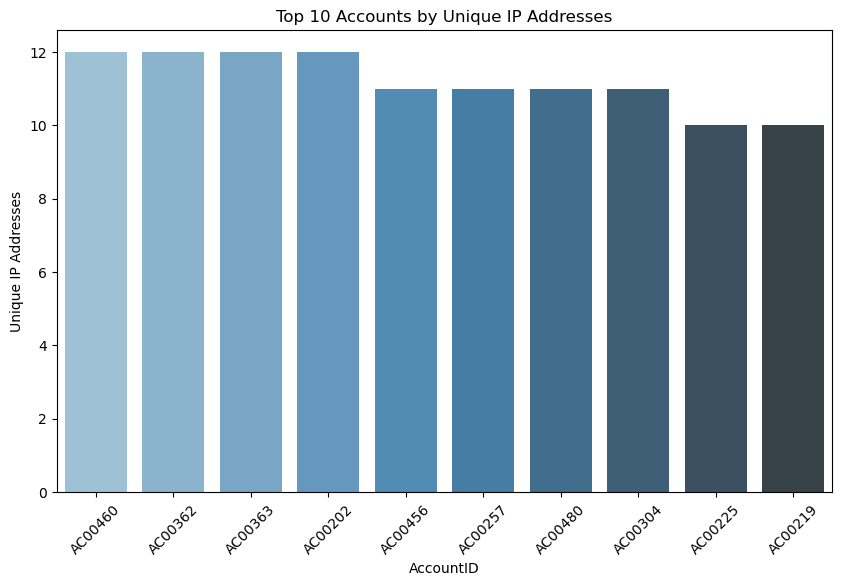

In [49]:
# Top 10 accounts with the highest unique IP addresses
top10_ips = account_variations.sort_values(by="Unique_IPs", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="AccountID", y="Unique_IPs", data=top10_ips, palette="Blues_d")
plt.title("Top 10 Accounts by Unique IP Addresses")
plt.xlabel("AccountID")
plt.ylabel("Unique IP Addresses")
plt.xticks(rotation=45)
plt.show()
